In [75]:
import requests as r
import pandas as pd

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
## start here!
## add eigenvectors to the network

eigenvalues_data = {}

datasets = [
    'final-homes-eigs-chicago-S000', 
    'final-homes-eigs-chicago-SA01', 
    'final-homes-eigs-chicago-SA02', 
    'final-homes-eigs-chicago-SA03', 
    'final-homes-eigs-chicago-SE01', 
    'final-homes-eigs-chicago-SE02', 
    'final-homes-eigs-chicago-SE03'
]

for dataset in datasets:
    for year in range(14):
        if dataset not in eigenvalues_data:
            eigenvalues_data[dataset] = {}
        
        year = year + 2002
        
        res = r.get('http://chicago.bnroths.com/data/%s/%s/1.json' % (dataset, year)).json()
        
        for a in res['data']:
            if a not in eigenvalues_data[dataset]:
                eigenvalues_data[dataset][a] = []
            eigenvalues_data[dataset][a].append(res['data'][a]['real'])

corrMatrix = pd.DataFrame()
print corrMatrix
for dataset in eigenvalues_data:
    for hood in sorted(eigenvalues_data[dataset]):   
        # print data[hood]
        # print data[hood]
        for i in range(len(eigenvalues_data[dataset][hood])):
            row = '%s-%s' % (hood, i)
            # corrMatrix.at[row, dataset] = eigenvalues_data[dataset][hood][i]
            if i == 0:
                corrMatrix.at[row, dataset] = 0
            else:
                corrMatrix.at[row, dataset] = eigenvalues_data[dataset][hood][i] - eigenvalues_data[dataset][hood][i-1]


Empty DataFrame
Columns: []
Index: []


In [77]:
files = [
    'Neighborhood_PctOfHomesIncreasingInValues_AllHomes.csv', 
    'Neighborhood_Zri_AllHomesPlusMultifamily.csv',
    'Neighborhood_Zhvi_AllHomes.csv', 
]

def normal(row):
    if row.name == 'RegionName':
        return row
    else:
        return row.divide(sum(row.fillna(0))/len(row))

def sub(row):
    return row.diff(periods=1)

for filename in files:
    print filename
    zillow = pd.read_csv('zillow_data/%s' % filename)
    # print zillow.index
    ## first normalize by column average
    
    try:
        zillow = zillow[(zillow.City == 'Chicago')][[
            'RegionName',
            '2002-01',
            '2003-01',
            '2004-01',
            '2005-01',
            '2006-01',
            '2007-01',
            '2008-01',
            '2009-01',
            '2010-01',
            '2011-01',
            '2012-01',
            '2013-01',
            '2014-01',
            '2015-01']]
    except:
        # rent index starts in 2010
        zillow = zillow[(zillow.City == 'Chicago')][[
            'RegionName',
            '2011-01',
            '2012-01',
            '2013-01',
            '2014-01',
            '2015-01']]

        
    zillow = zillow.transpose().apply(normal, axis=1)
    zillow = zillow.rename(columns=zillow.iloc[0]).drop(zillow.index[:1]).transpose()
    zillow =  zillow.apply(sub, axis=1)
    for index, row in zillow.iterrows():
        rows = list(row)
       
        for i, val in enumerate(rows):
            if len(rows) == 5:
                i += 9
            row = "%s-%s" % (index, i)
            # print row, val, dataset
            corrMatrix.at[row, filename] = val
            

Neighborhood_PctOfHomesIncreasingInValues_AllHomes.csv
Neighborhood_Zri_AllHomesPlusMultifamily.csv
Neighborhood_Zhvi_AllHomes.csv


In [78]:
corrMatrix = corrMatrix[corrMatrix.index.str.contains("-0") == False]

In [79]:
corrMatrix

,final-homes-eigs-chicago-SA01,final-homes-eigs-chicago-SA03,final-homes-eigs-chicago-SA02,final-homes-eigs-chicago-SE01,final-homes-eigs-chicago-SE03,final-homes-eigs-chicago-SE02,final-homes-eigs-chicago-S000,Neighborhood_PctOfHomesIncreasingInValues_AllHomes.csv,Neighborhood_Zri_AllHomesPlusMultifamily.csv,Neighborhood_Zhvi_AllHomes.csv
Albany Park-1,16.2,8.3,3.3,24.6,1.7,-14.3,6.0,0.155801,NaN,0.041310
Albany Park-2,-24.1,-4.5,-197.3,0.0,5.3,3.9,0.0,-0.050815,NaN,-0.025274
Albany Park-3,-15.5,4.4,190.4,-26.0,4.9,-14.9,-15.6,-0.084182,NaN,0.000995
Albany Park-4,2.1,-14.0,-13.5,-8.9,-6.7,-14.0,-7.0,-0.052467,NaN,-0.022112
Albany Park-5,-22.6,-31.7,-28.5,-35.1,-5.2,-23.2,-28.5,-0.154097,NaN,-0.005956
Albany Park-6,30.0,58.5,35.4,35.9,26.5,28.0,36.8,0.717475,NaN,0.048150
Albany Park-7,-37.5,-55.3,-48.9,-38.6,-47.2,-46.9,-48.0,-0.685055,NaN,-0.038378
Albany Park-8,35.0,52.8,59.2,43.8,39.8,57.8,53.1,0.078669,NaN,-0.065207
Albany Park-9,24.4,5.2,7.6,15.4,26.2,7.1,11.8,-0.123583,NaN,0.001169
Albany Park-10,-2.6,12.6,6.2,-4.6,0.6,10.3,3.5,0.637488,-0.024494,-0.054762


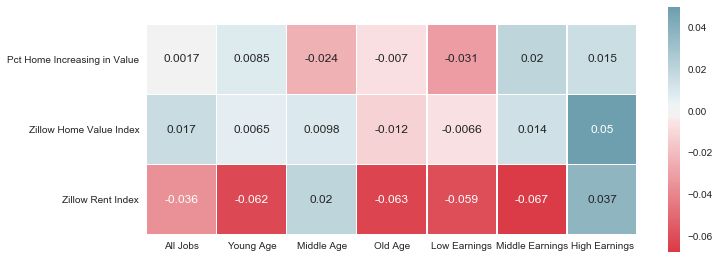

In [80]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

corr = corrMatrix.rename(index=str, columns={
    'Neighborhood_PctOfHomesIncreasingInValues_AllHomes.csv': 'Pct Home Increasing in Value',
    'Neighborhood_Zhvi_AllHomes.csv': 'Zillow Home Value Index',
    'Neighborhood_Zri_AllHomesPlusMultifamily.csv': 'Zillow Rent Index',
    'final-homes-eigs-chicago-S000': 'All Jobs', 
    'final-homes-eigs-chicago-SA01': 'Young Age', 
    'final-homes-eigs-chicago-SA02': 'Middle Age', 
    'final-homes-eigs-chicago-SA03': 'Old Age', 
    'final-homes-eigs-chicago-SE01': 'Low Earnings', 
    'final-homes-eigs-chicago-SE02': 'Middle Earnings', 
    'final-homes-eigs-chicago-SE03': 'High Earnings'
}).corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)
print cmap

corr_small = corr.loc[['Pct Home Increasing in Value', 'Zillow Home Value Index', 'Zillow Rent Index']][[
    'All Jobs', 
    'Young Age', 
    'Middle Age', 
    'Old Age', 
    'Low Earnings', 
    'Middle Earnings', 
    'High Earnings']]


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_small, 
    #mask=mask, 
    annot=True, 
    cmap=cmap, 
    center=0, 
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5})


In [59]:
corr

,Pct Home Increasing in Value,Zillow Rent Index,Zillow Home Value Index
Pct Home Increasing in Value,1.000000,0.110794,0.166658
Zillow Rent Index,0.110794,1.000000,0.189903
Zillow Home Value Index,0.166658,0.189903,1.000000


In [81]:
corrMatrix = corrMatrix.rename(index=str, columns={
    'Neighborhood_PctOfHomesIncreasingInValues_AllHomes.csv': 'Pct Home Increasing in Value',
    'Neighborhood_Zhvi_AllHomes.csv': 'Zillow Home Value Index',
    'Neighborhood_Zri_AllHomesPlusMultifamily.csv': 'Zillow Rent Index',
    'final-homes-eigs-chicago-S000': 'All Jobs', 
    'final-homes-eigs-chicago-SA01': 'Young Age', 
    'final-homes-eigs-chicago-SA02': 'Middle Age', 
    'final-homes-eigs-chicago-SA03': 'Old Age', 
    'final-homes-eigs-chicago-SE01': 'Low Earnings', 
    'final-homes-eigs-chicago-SE02': 'Middle Earnings', 
    'final-homes-eigs-chicago-SE03': 'High Earnings'
})

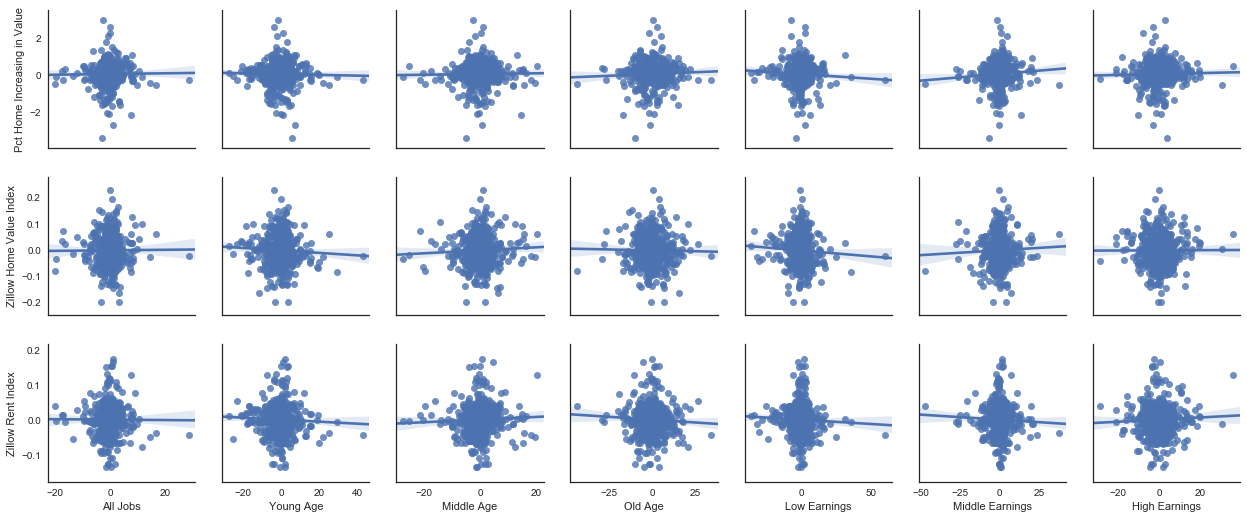

In [82]:
g = sns.pairplot(corrMatrix.dropna(),
    x_vars=['All Jobs', 
    'Young Age', 
    'Middle Age', 
    'Old Age', 
    'Low Earnings', 
    'Middle Earnings', 
    'High Earnings'],
    y_vars=['Pct Home Increasing in Value', 'Zillow Home Value Index', 'Zillow Rent Index'], 
    kind="reg")

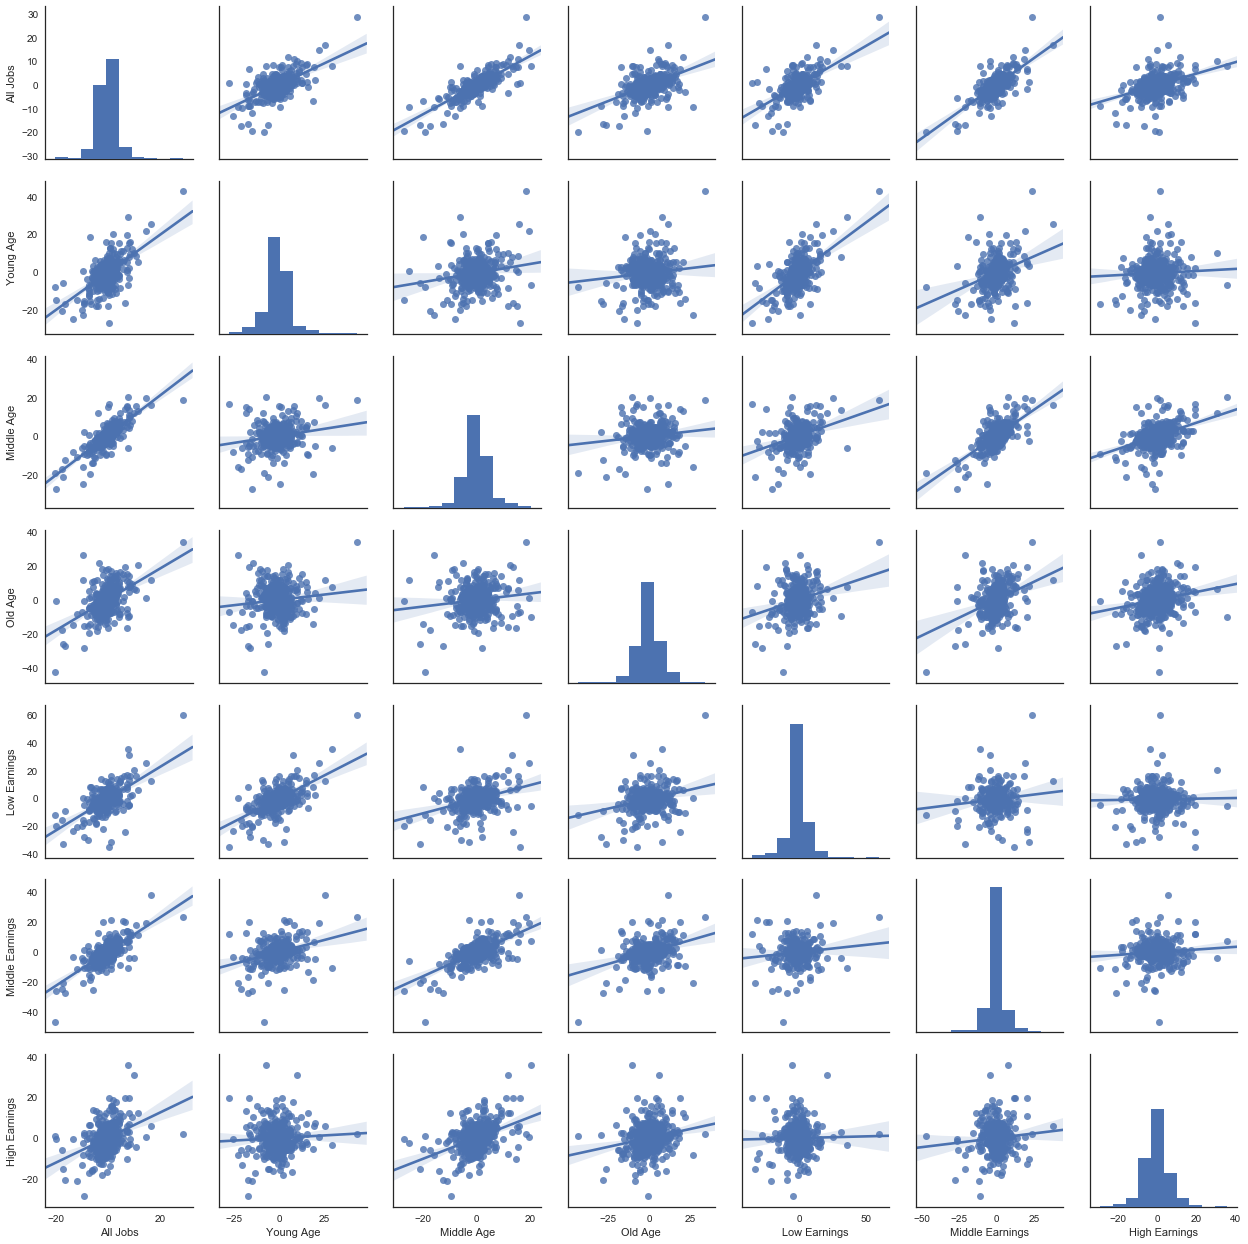

In [84]:
g = sns.pairplot(corrMatrix.dropna(),
    x_vars=['All Jobs', 
        'Young Age', 
        'Middle Age', 
        'Old Age', 
        'Low Earnings', 
        'Middle Earnings', 
        'High Earnings'],
    y_vars=['All Jobs', 
        'Young Age', 
        'Middle Age', 
        'Old Age', 
        'Low Earnings', 
        'Middle Earnings', 
        'High Earnings'], 
    kind="reg")